<a href="https://colab.research.google.com/github/nomi181472/MS-DS-Practice/blob/main/CV/practice/ACV_Practical_Version_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

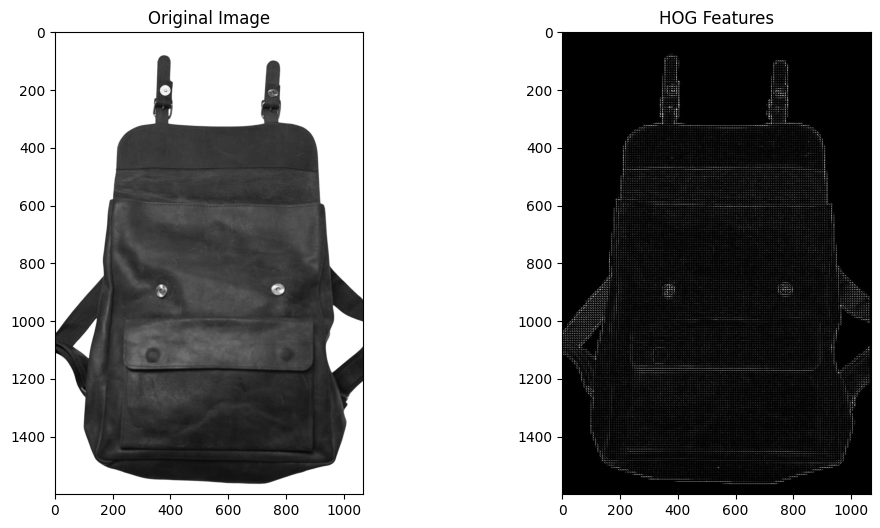

HOG Feature Vector:
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
from skimage.feature import hog
from skimage import exposure
import cv2
import matplotlib.pyplot as plt

# Read an image (grayscale)
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)

# Compute HOG features
features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Rescale the HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Plot the HOG image and its corresponding feature vector
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original Image')

plt.subplot(122)
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
plt.title('HOG Features')
plt.show()

# Print the HOG feature vector
print("HOG Feature Vector:")
print(features)


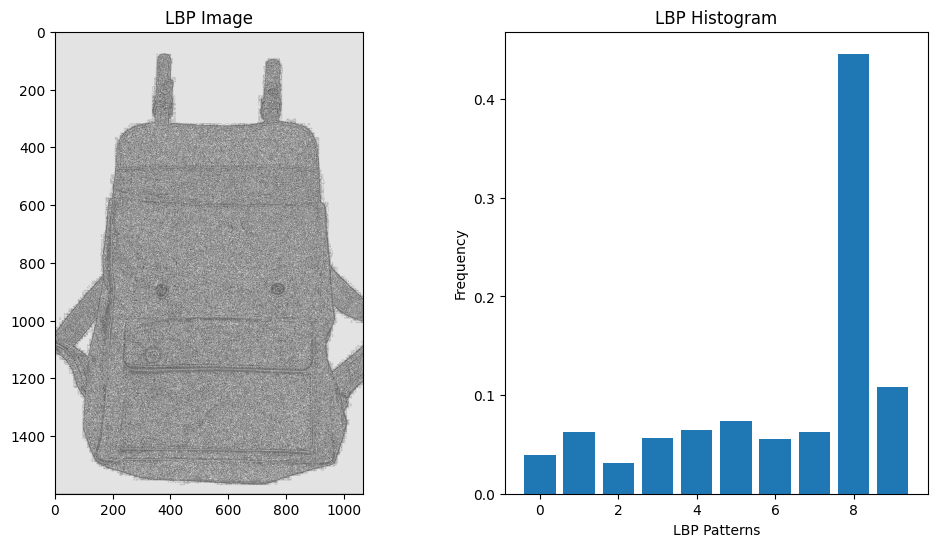

LBP Feature Vector:
[0.03900456 0.06251287 0.03153675 0.05660112 0.06466351 0.07324731
 0.05564607 0.06251053 0.44609258 0.10818469]


In [ ]:
from skimage import feature
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read an image (grayscale)
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)

# Compute LBP features
radius = 1  # Radius of the circular neighborhood
n_points = 8 * radius  # Number of neighboring pixels to consider
lbp_image = feature.local_binary_pattern(image, n_points, radius, method='uniform')

# Calculate the LBP histogram
hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

# Normalize the histogram
hist = hist.astype("float")
hist /= (hist.sum() + 1e-6)

# Display the LBP image and histogram
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(lbp_image, cmap='gray')
plt.title('LBP Image')

plt.subplot(122)
plt.bar(range(0, n_points + 2), hist)
plt.title('LBP Histogram')
plt.xlabel('LBP Patterns')
plt.ylabel('Frequency')
plt.show()

# Print the LBP feature vector
print("LBP Feature Vector:")
print(hist)



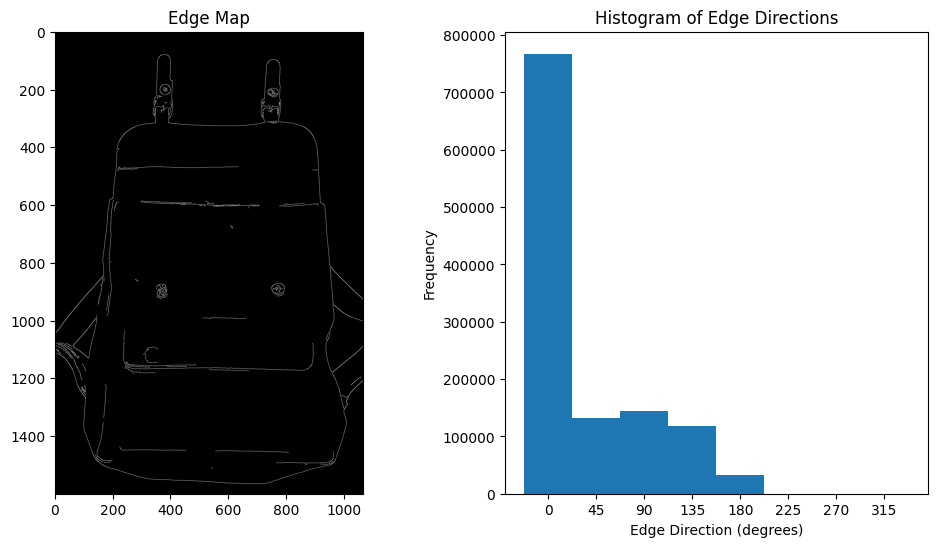

Histogram of Edge Directions (HED) Feature Vector:
[767533 132238 143776 118984  32842      0      0      0]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read an image (grayscale)
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing to reduce noise (optional)
image_smoothed = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(image_smoothed, threshold1=30, threshold2=70)

# Calculate gradient direction (orientation)
gradient_x = cv2.Sobel(image_smoothed, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(image_smoothed, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_orientation = np.arctan2(gradient_y, gradient_x) * 180 / np.pi

# Create a histogram of edge directions
hist, bin_edges = np.histogram(gradient_orientation, bins=8, range=(0, 360))

# Display the edge map and the histogram
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(edges, cmap='gray')
plt.title('Edge Map')

plt.subplot(122)
plt.bar(bin_edges[:-1], hist, width=45, align='center')
plt.title('Histogram of Edge Directions')
plt.xlabel('Edge Direction (degrees)')
plt.ylabel('Frequency')
plt.xticks(range(0, 360, 45))
plt.show()

# Print the HED feature vector (histogram)
print("Histogram of Edge Directions (HED) Feature Vector:")
print(hist)


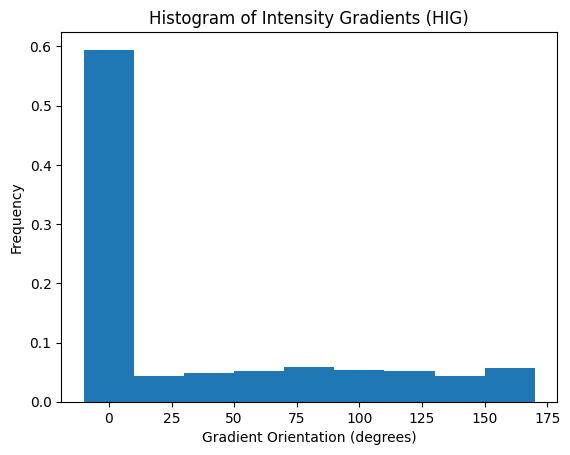

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read an image (grayscale)
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the gradient using the Sobel operator
dx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude and orientation of the gradient
magnitude = np.sqrt(dx**2 + dy**2)
orientation = np.arctan2(dy, dx) * (180 / np.pi)  # Convert radians to degrees

# Create a histogram of gradient orientations
histogram, bins = np.histogram(orientation, bins=9, range=(0, 180))

# Normalize the histogram (optional)
histogram = histogram / histogram.sum()

# Display the histogram
plt.bar(bins[:-1], histogram, width=20)
plt.title("Histogram of Intensity Gradients (HIG)")
plt.xlabel("Gradient Orientation (degrees)")
plt.ylabel("Frequency")
plt.show()


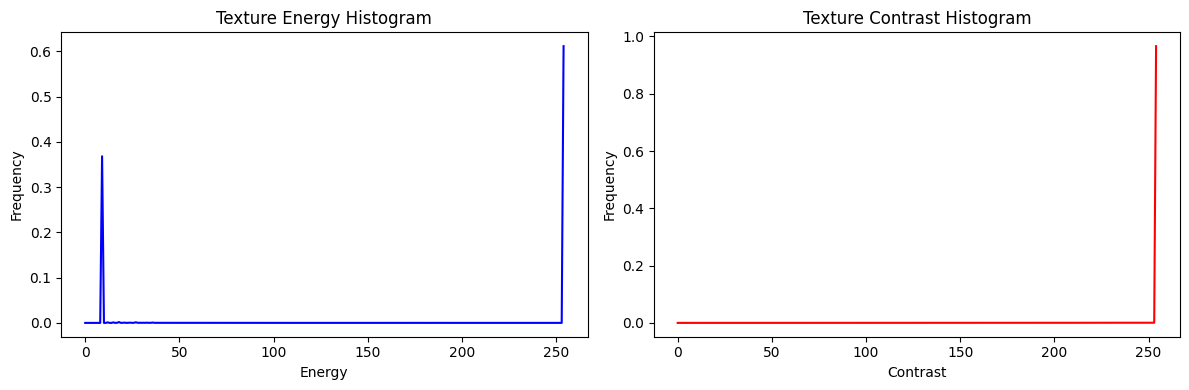

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read an image (grayscale)
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)

# Define the neighborhood size (e.g., 3x3 window)
neighborhood_size = 3

# Calculate texture energy and contrast using OpenCV filter2D
energy = cv2.filter2D(image ** 2, -1, np.ones((neighborhood_size, neighborhood_size)))
contrast = cv2.filter2D(image, -1, np.ones((neighborhood_size, neighborhood_size)))

# Compute histograms for texture energy and contrast
energy_histogram, energy_bins = np.histogram(energy, bins=256, range=(0, energy.max()))
contrast_histogram, contrast_bins = np.histogram(contrast, bins=256, range=(0, contrast.max()))

# Normalize histograms (optional)
energy_histogram = energy_histogram / energy_histogram.sum()
contrast_histogram = contrast_histogram / contrast_histogram.sum()

# Display the histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(energy_bins[:-1], energy_histogram, color='b')
plt.title("Texture Energy Histogram")
plt.xlabel("Energy")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.plot(contrast_bins[:-1], contrast_histogram, color='r')
plt.title("Texture Contrast Histogram")
plt.xlabel("Contrast")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


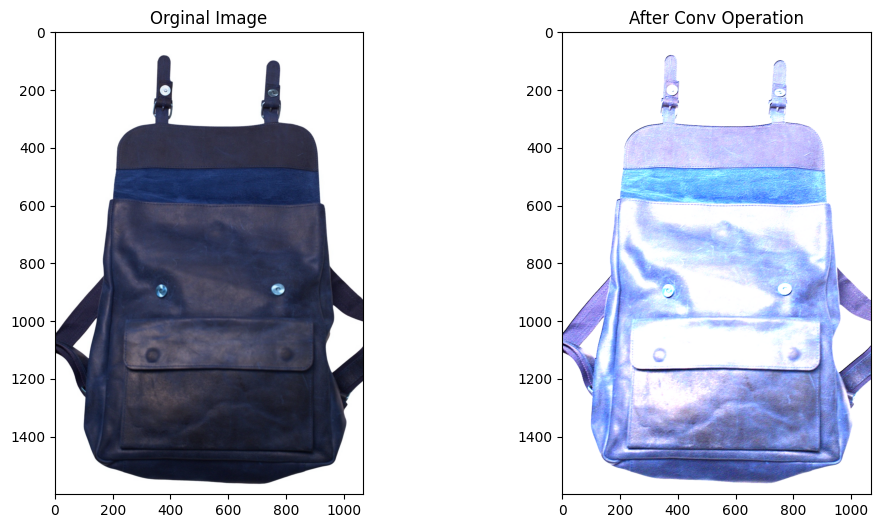

In [ ]:
import cv2
import numpy as np
# Read an image
image = cv2.imread('Image1.jpg')
# Define a box blur kernel
kernel = np.ones((3, 3), dtype=np.float32) / 9
# Apply convolution
blurred_image = cv2.filter2D(image, -1, kernel)
# Define a Gaussian blur kernel
kernel_size = (5, 5)
sigma = 1.0
kernel = cv2.getGaussianKernel(kernel_size[0], sigma)
gaussian_blur = cv2.filter2D(image, -1, kernel)
# Sobel edge detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Scharr edge detection
scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)
# Define an emboss kernel
kernel = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]], dtype=np.float32)
embossed_image = cv2.filter2D(image, -1, kernel)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Orginal Image')

plt.subplot(122)
plt.imshow(embossed_image, cmap=plt.cm.gray)
plt.title('After Conv Operation')
plt.show()


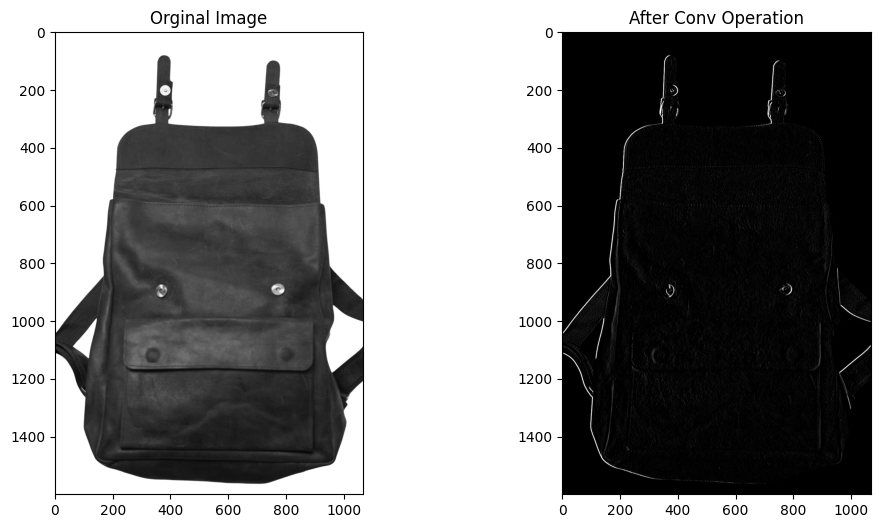

In [ ]:
import cv2
import numpy as np
# Read an image
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)
# Define a kernel (3x3 example)
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]], dtype=np.float32)

# Apply standard convolution
result = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Orginal Image')

plt.subplot(122)
plt.imshow(result, cmap=plt.cm.gray)
plt.title('After Conv Operation')
plt.show()


In [ ]:
import cv2
import numpy as np

# Read an image
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)

# Define a kernel (3x3 example)
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]], dtype=np.float32)

# Apply valid convolution (no padding)
result = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_CONSTANT)


In [ ]:
import cv2
import numpy as np
# Read an image
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)

# Define a kernel (3x3 example)
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]], dtype=np.float32)

# Apply same convolution (zero padding)
result = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_REFLECT)


In [ ]:
import cv2
import numpy as np

# Read an image
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)

# Define a kernel (3x3 example)
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]], dtype=np.float32)

# Apply valid convolution with a stride of 2
result = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_CONSTANT)


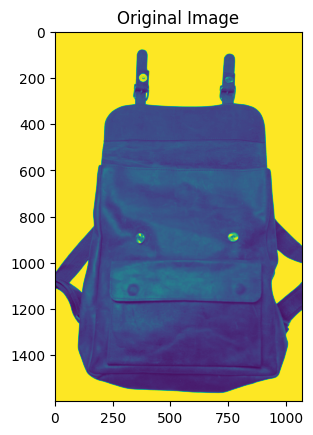

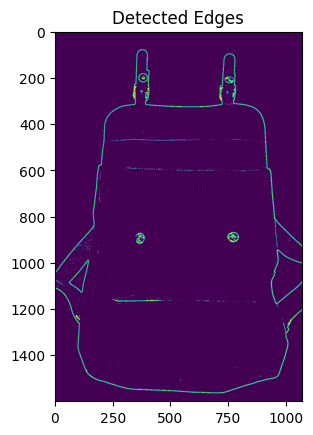

In [ ]:
# Read an image in grayscale
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)
# Apply Sobel operator to calculate gradients
gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in the x-direction
gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in the y-direction
# Calculate the gradient magnitude and direction
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y, gradient_x)
# Optionally, you can apply a threshold to identify edges
threshold = 100
edges = (gradient_magnitude > threshold).astype(np.uint8) * 255
# Display the original image and detected edges
# cv2.imshow('Original Image', image)
# cv2.imshow('Detected Edges', edges)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(image)
plt.title('Original Image')
plt.show()
plt.imshow(edges)
plt.title('Detected Edges')
plt.show()


In [ ]:
import cv2
# Read an image in grayscale
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(image, threshold1=100, threshold2=200)  # Adjust threshold values as needed

# Display the edge map
# cv2.imshow('Canny Edges', edges)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(edges)
plt.title('Canny Edges')
plt.show()


In [ ]:
import cv2
import numpy as np

# Load the image in grayscale
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing
image_smoothed = cv2.GaussianBlur(image, (5, 5), 0)

# Apply the Laplacian operator
laplacian = cv2.Laplacian(image_smoothed, cv2.CV_64F)

# Find zero crossings
#edges = cv2.Canny(laplacian, threshold1=30, threshold2=100)

# Display the results
# cv2.imshow('Original Image', image)
# #cv2.imshow('LoG Edge Detection', edges)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(edges)
plt.title('LoG Edge Detection')
plt.show()

In [ ]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Laplacian operator for edge detection
laplacian = cv2.Laplacian(smoothed_image, cv2.CV_64F)

# Find zero-crossings in the Laplacian image
edges = cv2.threshold(np.abs(laplacian), 30, 255, cv2.THRESH_BINARY)[1]

# # Display the original image and edge map
# cv2.imshow('Original Image', image)
# cv2.imshow('Edge Map (Marr-Hildreth)', edges)

# # Wait for a key press and then close the windows
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(image)
plt.title('Original Image')
plt.show()
plt.imshow(edges)
plt.title('Detected Edges')
plt.show()


In [ ]:
import cv2
import numpy as np

# Read an image
image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)

# Define parameters
block_size = 2  # Neighborhood size for computing the structure tensor
k = 0.04  # Empirical constant (usually in the range [0.04, 0.06])

# Compute Harris corner scores
corner_scores = cv2.cornerHarris(image, block_size, 3, k)  # Add '3' as the third argument
# Threshold the corner scores to identify corners
threshold = 0.01 * corner_scores.max()
corners = np.where(corner_scores > threshold)

# Draw circles at the detected corners
#Detect Shi-Tomasi corners
corners = cv2.goodFeaturesToTrack(image, maxCorners=100, qualityLevel=0.01, minDistance=10)
# Create a FAST detector object with specified parameters
fast = cv2.FastFeatureDetector_create(threshold=40, nonmaxSuppression=True)
# Detect FAST keypoints
keypoints = fast.detect(image, None)
# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)
# # Create a SURF object
# surf = cv2.SURF_create()

# # Detect keypoints and compute descriptors
# keypoints, descriptors = surf.detectAndCompute(image, None)


In [ ]:
import cv2
import numpy as np

# Load two images
image1 = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)

# Create ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors in both images
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Create a Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort them in ascending order of distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the first 10 matches
match_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], outImg=None)

# # Display the matches
# cv2.imshow('Matches', match_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(match_image)
plt.title('Matches')
plt.show()

